# Locally Weighted Regression

## Implement the non-parametric Locally Weighted Regressionlgorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs.

In [2]:
from math import ceil
import math
import numpy as np
from scipy import linalg

In [3]:
def lowess(x, y, f, iterations):
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w**3)**3
    y_estimate = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iterations):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights),np.sum(weights * x)],[np.sum(weights * x),np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            y_estimate[i] = beta[0] + beta[1] * x[i]
    
        residuals = y - y_estimate
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta**2)**2
    return y_estimate

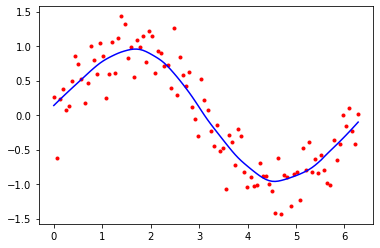

In [11]:
import math
n = 100
x = np.linspace(0, 2 * math.pi, n)
y = np.sin(x) + 0.3 * np.random.randn(n)
f = 0.25
iterations = 3
y_estimate = lowess(x, y, f, iterations)


import matplotlib.pyplot as plt
plt.plot(x, y, "r.")
plt.plot(x, y_estimate, "b-")

In [5]:
# from numpy import *
# from os import listdir
# import matplotlib
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np1
# import numpy.linalg as np
# from scipy.stats.stats import pearsonr
 
# def kernel(point,xmat, k):
#     m,n = np1.shape(xmat)
#     weights = np1.mat(np1.eye((m)))
#     for j in range(m):
#         diff = point - X[j]
#         weights[j,j] = np1.exp(diff*diff.T/(-2.0*k**2))
#     return weights
 
# def localWeight(point,xmat,ymat,k):
#     wei = kernel(point,xmat,k)
#     W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
#     return W
     
# def localWeightRegression(xmat,ymat,k):
#     m,n = np1.shape(xmat)
#     ypred = np1.zeros(m)
#     for i in range(m):
#         ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
#     return ypred
       
# # load data points
# data = pd.read_csv('tips.csv')
# bill = np1.array(data.total_bill)
# tip = np1.array(data.tip)
 
# #preparing and add 1 in bill
# mbill = np1.mat(bill)
# mtip = np1.mat(tip) # mat is used to convert to n dimesiona to 2 dimensional array form
# m= np1.shape(mbill)[1]
# # print(m) 244 data is stored in m
# one = np1.mat(np1.ones(m)) 
# X= np1.hstack((one.T,mbill.T)) # create a stack of bill from ONE
# #print(X)
# #set k here
# ypred = localWeightRegression(X,mtip,0.3) 
# SortIndex = X[:,1].argsort(0)
# xsort = X[SortIndex][:,0]
     
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.scatter(bill,tip, color='green')
# ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
# plt.xlabel('Total bill')
# plt.ylabel('Tip')
# plt.show();

In [6]:
# import numpy as np
# from bokeh.plotting import figure, show, output_notebook
# from bokeh.layouts import gridplot
# from bokeh.io import push_notebook

# def local_regression(x0, X, Y, tau):
#     # add bias term
#      x0 = np.r_[1, x0] # Add one to avoid the loss in information
#      X = np.c_[np.ones(len(X)), X]

#  # fit model: normal equations with kernel
#  xw = X.T * radial_kernel(x0, X, tau) # XTranspose * W

#  beta = np.linalg.pinv(xw @ X) @ xw @ Y #@ Matrix Multiplication or Dot Product


#  # predict value
#  return x0 @ beta # @ Matrix Multiplication or Dot Product for prediction
# def radial_kernel(x0, X, tau):
#  return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))
# # Weight or Radial Kernal Bias Function

# n = 1000
# # generate dataset
# X = np.linspace(-3, 3, num=n)
# print("The Data Set ( 10 Samples) X :\n",X[1:10])
# Y = np.log(np.abs(X ** 2 - 1) + .5)
# print("The Fitting Curve Data Set (10 Samples) Y :\n",Y[1:10])
# # jitter X
# X += np.random.normal(scale=.1, size=n)
# print("Normalised (10 Samples) X :\n",X[1:10])

# domain = np.linspace(-3, 3, num=300)
# print(" Xo Domain Space(10 Samples) :\n",domain[1:10])
# def plot_lwr(tau):
#  # prediction through regression
#  prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
#  plot = figure(plot_width=400, plot_height=400)
#  plot.title.text='tau=%g' % tau
#  plot.scatter(X, Y, alpha=.3)
#  plot.line(domain, prediction, line_width=2, color='red')
#  return plot

# show(gridplot([
#  [plot_lwr(10.), plot_lwr(1.)],
#  [plot_lwr(0.1), plot_lwr(0.01)]]))